## Milligrad Demo

### Imports

In [ ]:
from milligrad import Tensor
from milligrad.nn import MLP
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

### Data

In [12]:
mnist = fetch_openml("Fashion-MNIST", version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

X = (X - X.mean()) / X.std()

label_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

y_onehot = np.zeros((len(y), 10))
for i in range(len(y)):
    y_onehot[i, y[i]] = 1

### Training

In [13]:
model = MLP(784, [98, 64, 32, 16, 10])

In [14]:
batch_size = 128
learning_rate = 0.01

for i in range(10_001):
    idx = np.random.choice(len(X), batch_size, replace=False)
    X_batch = Tensor(X[idx])
    y_batch = Tensor(y_onehot[idx])

    model.zero_grad()
    log_probs = model(X_batch).log_softmax()
    loss_i = (y_batch * log_probs).sum() * (-1.0 / batch_size)
    loss_i.backward()

    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if i % 1000 == 0:
        preds = model(Tensor(X)).data.argmax(axis=1)
        acc = (preds == y).mean()
        print(f"Step {i} accuracy: {acc:.2%}")

Step 0 accuracy: 9.08%
Step 1000 accuracy: 83.75%
Step 2000 accuracy: 85.84%
Step 3000 accuracy: 86.02%
Step 4000 accuracy: 87.00%
Step 5000 accuracy: 88.39%
Step 6000 accuracy: 88.70%
Step 7000 accuracy: 89.17%
Step 8000 accuracy: 89.16%
Step 9000 accuracy: 89.63%
Step 10000 accuracy: 90.20%


### Visualisation

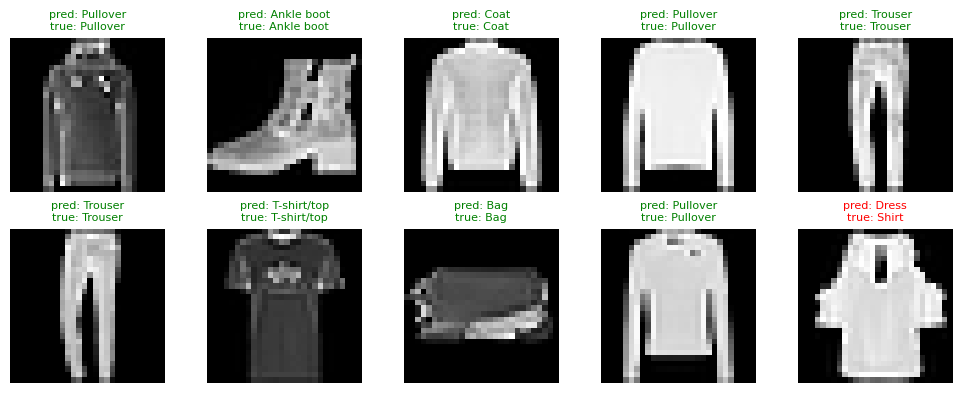

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
samples = np.random.choice(len(X), 10, replace=False)

for ax, idx in zip(axes.flat, samples):
    predicted = model(Tensor(X[idx : idx + 1])).data.argmax()
    true_label = y[idx]
    ax.imshow(X[idx].reshape(28, 28), cmap="gray")
    ax.set_title(
        f"pred: {label_names[predicted]}\ntrue: {label_names[true_label]}",
        color="green" if predicted == true_label else "red",
        fontsize=8,
    )
    ax.axis("off")

plt.tight_layout()
plt.show()